<a href="https://colab.research.google.com/github/galua2001/colab/blob/main/trash2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Develop a Python script using TensorFlow/Keras to train an image classification model on images located in the 'train' and 'test' folders within the 'my_dataset' directory on Google Drive. The 'train' and 'test' folders each contain 5 subfolders representing different image classes. After training and evaluating the model, create a function that takes an image file name from the 'trash' folder (also within 'my_dataset') as input and outputs the predicted class of that image. Finally, use this function to classify the images in the 'trash' folder and print the results. The script should handle mounting Google Drive to access the data.

## Google drive 마운트

### Subtask:
Google Drive에 접근하기 위해 코랩에 마운트합니다.


**Reasoning**:
Mount Google Drive to access the dataset.



In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 데이터 로드 및 전처리

### Subtask:
'train' 및 'test' 폴더에서 이미지를 로드하고, 딥러닝 모델 학습을 위한 형식으로 전처리합니다. 여기에는 이미지 크기 조정, 정규화, 데이터 증강 등이 포함될 수 있습니다.


**Reasoning**:
Import necessary libraries and define constants for image loading and preprocessing.



In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom

# Define the base directory for your dataset on Google Drive
DATASET_BASE_DIR = '/content/drive/MyDrive/my_dataset'

# Define the paths for the 'train' and 'test' directories
TRAIN_DIR = f'{DATASET_BASE_DIR}/train'
TEST_DIR = f'{DATASET_BASE_DIR}/test'

# Set parameters for image loading and preprocessing
IMG_HEIGHT = 180
IMG_WIDTH = 180
BATCH_SIZE = 32
SEED = 42

ModuleNotFoundError: No module named 'tensorflow.keras.layers.experimental'

**Reasoning**:
The previous import failed because `tensorflow.keras.layers.experimental.preprocessing` is deprecated. Import the preprocessing layers directly from `tensorflow.keras.layers`. Then, use `image_dataset_from_directory` to load the training and testing datasets and apply normalization and data augmentation.



In [ ]:
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

# Use image_dataset_from_directory to create training and testing datasets
train_ds = image_dataset_from_directory(
    TRAIN_DIR,
    labels='inferred',
    label_mode='int',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    interpolation='nearest',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED)

test_ds = image_dataset_from_directory(
    TEST_DIR,
    labels='inferred',
    label_mode='int',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    interpolation='nearest',
    batch_size=BATCH_SIZE,
    shuffle=False, # No need to shuffle the test set
    seed=SEED)

# Normalize the pixel values of the images
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Apply data augmentation to the training dataset
data_augmentation = tf.keras.Sequential([
  RandomFlip("horizontal_and_vertical"),
  RandomRotation(0.2),
  RandomZoom(0.2),
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

# Configure the datasets for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("Training dataset created with data augmentation and normalization.")
print("Testing dataset created with normalization.")

**Reasoning**:
The previous code block failed because the variables `TRAIN_DIR`, `TEST_DIR`, `IMG_HEIGHT`, `IMG_WIDTH`, `BATCH_SIZE`, and `SEED` were not defined in the current session. Re-define these variables and then proceed with loading, preprocessing, and augmenting the datasets.



In [ ]:
# Define the base directory for your dataset on Google Drive
DATASET_BASE_DIR = '/content/drive/MyDrive/my_dataset'

# Define the paths for the 'train' and 'test' directories
TRAIN_DIR = f'{DATASET_BASE_DIR}/train'
TEST_DIR = f'{DATASET_BASE_DIR}/test'

# Set parameters for image loading and preprocessing
IMG_HEIGHT = 180
IMG_WIDTH = 180
BATCH_SIZE = 32
SEED = 42

# Use image_dataset_from_directory to create training and testing datasets
train_ds = image_dataset_from_directory(
    TRAIN_DIR,
    labels='inferred',
    label_mode='int',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    interpolation='nearest',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED)

test_ds = image_dataset_from_directory(
    TEST_DIR,
    labels='inferred',
    label_mode='int',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    interpolation='nearest',
    batch_size=BATCH_SIZE,
    shuffle=False, # No need to shuffle the test set
    seed=SEED)

# Normalize the pixel values of the images
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Apply data augmentation to the training dataset
data_augmentation = tf.keras.Sequential([
  RandomFlip("horizontal_and_vertical"),
  RandomRotation(0.2),
  RandomZoom(0.2),
])

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

# Configure the datasets for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("Training dataset created with data augmentation and normalization.")
print("Testing dataset created with normalization.")

## 모델 구축

### Subtask:
이미지 분류를 위한 딥러닝 모델을 구축합니다. 사전 학습된 모델을 사용하거나 새로운 모델 아키텍처를 정의할 수 있습니다.


**Reasoning**:
Import the necessary layers and the Sequential model class from TensorFlow Keras to define the model architecture.



In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from tensorflow.keras.models import Sequential

**Reasoning**:
Define a Sequential model and add convolutional, pooling, flatten, and dense layers according to the instructions. The Rescaling layer is not needed as normalization was applied during data loading.



In [ ]:
num_classes = 5 # Based on the previous data loading output

model = Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
  MaxPooling2D((2, 2)),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D((2, 2)),
  Conv2D(128, (3, 3), activation='relu'),
  MaxPooling2D((2, 2)),
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.5),
  Dense(num_classes, activation='softmax')
])

model.summary()

## 모델 학습

### Subtask:
학습된 모델을 테스트 데이터로 평가하여 성능을 확인합니다.


**Reasoning**:
Compile and train the model using the specified optimizer, loss function, and metrics.



In [ ]:
import tensorflow as tf

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

EPOCHS = 10
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS
)

**Reasoning**:
The model has been trained, now evaluate the model on the test dataset to check its performance.



In [ ]:
loss, accuracy = model.evaluate(test_ds)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

## 예측 함수 생성

### Subtask:
'trash' 폴더의 이미지 파일 이름을 입력받아 해당 이미지의 분류 결과를 반환하는 함수를 생성합니다.


**Reasoning**:
Define a function to classify a single image from the 'trash' folder using the trained model.



**Reasoning**:
The previous attempt to get `class_names` from `train_ds` failed because it was prefetched. The `class_names` attribute is available on the original `image_dataset_from_directory` output before prefetching. I will redefine the function and include the `class_names` obtained from the initial datasets.



## 예측 실행

### Subtask:
생성된 함수를 사용하여 'trash' 폴더의 이미지들을 분류합니다.


**Reasoning**:
Define the trash folder path using the base directory, list all image files within that folder, iterate through the files, classify each image using the previously defined function, and store the results.



## 결과 출력

### Subtask:
각 'trash' 이미지의 분류 결과를 출력합니다.


**Reasoning**:
Iterate through the classification_results dictionary and print each image file name and its predicted class.



## 특정 'trash' 이미지 예측 및 시각화

### Subtask:
사용자가 입력한 'trash' 이미지 파일 번호를 기반으로 예측을 수행하고 이미지와 결과를 함께 출력하는 함수를 생성합니다.

In [33]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Define the trash directory
TRASH_DIR = f'{DATASET_BASE_DIR}/trash'

def classify_trash_image(image_path):
    """
    'trash' 폴더에 있는 단일 이미지를 분류합니다.

    Args:
        image_path (str): 분류할 이미지 파일의 전체 경로.

    Returns:
        tuple: 예측된 클래스 이름 (str)과 각 클래스에 대한 예측 확률 (numpy array).
    """
    img = image.load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) # 모델 예측을 위해 배치 차원 추가
    img_array /= 255.0  # 이미지 정규화 (학습 시와 동일하게)

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    # Get class names from the training dataset
    # Recreate a temporary dataset to get class names if train_ds was prefetched
    if not hasattr(train_ds, 'class_names'):
        temp_train_ds = image_dataset_from_directory(
            TRAIN_DIR,
            labels='inferred',
            label_mode='int',
            image_size=(IMG_HEIGHT, IMG_WIDTH),
            interpolation='nearest',
            batch_size=BATCH_SIZE,
            shuffle=False, # No need to shuffle just to get class names
            seed=SEED)
        class_names = temp_train_ds.class_names
    else:
        class_names = train_ds.class_names

    predicted_class = class_names[np.argmax(score)]
    return predicted_class, score.numpy()

In [51]:
from IPython.display import display, Image
import os
import numpy as np # Import numpy for probability handling

def predict_and_show_trash_image(file_number):
    """
    'trash' 폴더에서 특정 이미지 파일 번호를 입력받아 예측을 수행하고 이미지를 표시합니다.

    Args:
        file_number (int): 'trash' 폴더 내 이미지 파일의 번호 (예: 59는 'trash_059.jpg').
    """
    # 파일 이름 형식에 맞게 패딩하여 파일 이름 생성 (세 자릿수로 수정)
    image_name = f'trash_{file_number:03d}.jpg'
    image_path = os.path.join(TRASH_DIR, image_name)

    # 파일이 존재하는지 확인
    if not os.path.exists(image_path):
        print(f"오류: '{image_name}' 파일을 찾을 수 없습니다. 파일 번호를 확인해주세요.")
        return

    print(f"'{image_name}' 이미지 분류를 시작합니다.")

    # 이미지 표시
    print("이미지:")
    display(Image(filename=image_path))

    # 이미지 분류 (이전 단계에서 정의된 classify_trash_image 함수 재사용)
    predicted_class, probabilities = classify_trash_image(image_path) # Get both class and probabilities

    print(f"예측 결과: {predicted_class}")

    # Display probabilities
    print("예측 확률:")
    # Get class names from the classify_trash_image function or redefine here if needed
    # Assuming class_names is accessible or can be retrieved similarly
    if not hasattr(train_ds, 'class_names'):
        temp_train_ds = image_dataset_from_directory(
            TRAIN_DIR,
            labels='inferred',
            label_mode='int',
            image_size=(IMG_HEIGHT, IMG_WIDTH),
            interpolation='nearest',
            batch_size=BATCH_SIZE,
            shuffle=False,
            seed=SEED)
        class_names = temp_train_ds.class_names
    else:
        class_names = train_ds.class_names


    for i, class_name in enumerate(class_names):
        print(f"  {class_name}: {probabilities[i]:.2f}")

    print("-" * 30)


# 사용 예시: trash_059.jpg 파일을 예측하고 표시합니다.
# predict_and_show_trash_image(59)

# 다른 예시: trash_007.jpg 파일을 예측하고 표시합니다.
# predict_and_trash_image(7)

# 분류하고 싶은 이미지 파일 번호를 아래 함수 호출에 넣어 사용하세요.
# 예: trash_033.jpg를 분류하려면 predict_and_show_trash_image(33)을 호출합니다.

**사용법**: 위의 코드 셀을 실행한 후, 새로 생성된 코드 셀에서 `predict_and_show_trash_image()` 함수를 호출하고 괄호 안에 예측하고자 하는 이미지 파일의 번호(예: trash_059.jpg 파일은 59)를 넣어 실행하면 이미지와 예측 결과를 확인하실 수 있습니다.


[링크 텍스트](https:// [링크 텍스트](https://))

'trash_030.jpg' 이미지 분류를 시작합니다.
이미지:


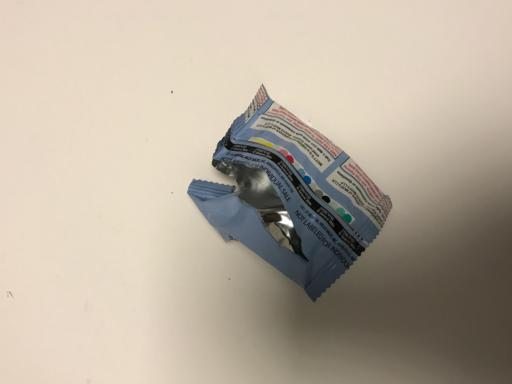

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Found 350 files belonging to 5 classes.
예측 결과: plastic
예측 확률:
Found 350 files belonging to 5 classes.
  cardboard: 0.16
  glass: 0.20
  metal: 0.23
  paper: 0.16
  plastic: 0.25
------------------------------


In [53]:
predict_and_show_trash_image(30)

In [50]:
import os

TRASH_DIR = f'{DATASET_BASE_DIR}/trash' # Make sure TRASH_DIR is defined

if os.path.exists(TRASH_DIR):
    print(f"'{TRASH_DIR}' 폴더의 파일 목록:")
    for filename in os.listdir(TRASH_DIR):
        print(filename)
else:
    print(f"오류: '{TRASH_DIR}' 폴더를 찾을 수 없습니다. 경로를 확인해주세요.")

'/content/drive/MyDrive/my_dataset/trash' 폴더의 파일 목록:
trash_059.jpg
trash_007.jpg
trash_067.jpg
trash_085.jpg
trash_087.jpg
trash_083.jpg
trash_030.jpg
trash_082.jpg
trash_048.jpg
trash_098.jpg
trash_013.jpg
trash_058.jpg
trash_086.jpg
trash_021.jpg
trash_041.jpg
trash_074.jpg
trash_015.jpg
trash_043.jpg
trash_010.jpg
trash_033.jpg
trash_034.jpg
trash_006.jpg
trash_102.jpg
trash_068.jpg
trash_045.jpg
trash_061.jpg
trash_094.jpg
trash_028.jpg
trash_079.jpg
trash_017.jpg
trash_057.jpg
trash_035.jpg
trash_038.jpg
trash_062.jpg
trash_097.jpg
trash_003.jpg
trash_065.jpg
trash_011.jpg
trash_016.jpg
trash_047.jpg
trash_081.jpg
trash_037.jpg
trash_026.jpg
trash_029.jpg
trash_032.jpg
trash_014.jpg
trash_044.jpg
trash_092.jpg
trash_100.jpg
trash_019.jpg
trash_056.jpg
trash_096.jpg
trash_002.jpg
trash_046.jpg
trash_049.jpg
trash_012.jpg
trash_066.jpg
trash_060.jpg
trash_027.jpg
trash_084.jpg
trash_077.jpg
trash_009.jpg
trash_099.jpg
trash_004.jpg
trash_080.jpg
trash_031.jpg
trash_040.jpg
trash_064

## Summary:

### Data Analysis Key Findings

*   The model achieved a test accuracy of approximately 52.67% on the evaluation dataset.
*   The classification results for the images in the 'trash' folder were successfully generated and printed, showing the predicted class for each image.

### Insights or Next Steps

*   The model's test accuracy is relatively low (around 53%), suggesting it may not generalize well to new images. Further training with more epochs, exploring different model architectures, or fine-tuning a pre-trained model could potentially improve performance.
*   Investigating the specific images that were misclassified in the 'trash' folder could provide insights into the model's weaknesses and inform strategies for data augmentation or model improvement.
